In [154]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
# from statsmodels.sandbox.distributions.multivariate import multivariate_t_rvs # for t-distribution

random.seed(12)

In [155]:
def width2var(w):
    var = (w/2)**2
    return var

# Choose roughly 60% of the intended width as width2var param

In [156]:
# Medium 1 (Wanne/WHO)
mean_m1 = (2500, 1000, 25)
cov_m1 = [[width2var(2800), width2var(200), 0], [width2var(200), width2var(1100), 0], [0,0,5]]
data_m1 = np.random.multivariate_normal(mean_m1, cov_m1, (350))
data_m1 = data_m1[(data_m1.T[0] >= 0) & (data_m1.T[0] <=3543) & (data_m1.T[1] >= 0) & (data_m1.T[1] <= 5315)]
col_m = 'orange'
print(data_m1.shape)

# Medium 2 (Südstadt)
mean_m2 = (2500, 4500, 25)
cov_m2 = [[width2var(2500), 0,0], [0, width2var(2500), 0],[0,0,5]]
data_m2 = np.random.multivariate_normal(mean_m2, cov_m2, (400))
data_m2 = data_m2[(data_m2.T[0] >= 0) & (data_m2.T[0] <=3543) & (data_m2.T[1] >= 0) & (data_m2.T[1] <= 5315)]
col_m = 'orange'
print(data_m2.shape)

# Expensive 1 (Öberg, Innenstadt)
mean_e1 = (3500, 2900, 35)
cov_e1 = [[width2var(4000), width2var(100), 0], [width2var(100), width2var(2000), 0], [0,0,5]]
data_e1 = np.random.multivariate_normal(mean_e1, cov_e1, (500))
data_e1 = data_e1[(data_e1.T[0] >= 0) & (data_e1.T[0] <=3543) & (data_e1.T[1] >= 0) & (data_e1.T[1] <= 5315)]
col_e = 'blue'
print(data_e1.shape)

# Expensive 2 (Schlossberg)
mean_e2 = (0, 3000, 35)
cov_e2 = [[width2var(2000), width2var(300), 0], [width2var(300), width2var(750), 0], [0,0,5]]
data_e2 = np.random.multivariate_normal(mean_e2, cov_e2, (100))
data_e2 = data_e2[(data_e2.T[0] >= 0) & (data_e2.T[0] <=3543) & (data_e2.T[1] >= 0) & (data_e2.T[1] <= 5315)]
col_e = 'blue'
print(data_e2.shape)

# Cheap 1 (Weststadt)
mean_c1 = (400, 1000, 15)
cov_c1 = [[width2var(1800), width2var(-100), 0], [width2var(-100), width2var(2000), 0], [0,0,5]]
data_c1 = np.random.multivariate_normal(mean_c1, cov_c1, (350))
data_c1 = data_c1[(data_c1.T[0] >= 0) & (data_c1.T[0] <=3543) & (data_c1.T[1] >= 0) & (data_c1.T[1] <= 5315)]
col_c = 'pink'
print(data_c1.shape)

# Medium 3 (Derendingen)
mean_m3 = (1000, 4500, 25)
cov_m3 = [[width2var(2200), width2var(200), 0], [width2var(200), width2var(1000), 0], [0,0,5]]
data_m3 = np.random.multivariate_normal(mean_m3, cov_m3, (100))
data_m3 = data_m3[(data_m3.T[0] >= 0) & (data_m3.T[0] <=3543) & (data_m3.T[1] >= 0) & (data_m3.T[1] <= 5315)]
col_m = 'orange'
print(data_m3.shape)


(256, 3)
(232, 3)
(219, 3)
(60, 3)
(220, 3)
(75, 3)


In [157]:
# Tried out t-distributions instead of Gaussians => shitty

In [158]:
data = np.concatenate((data_m1, data_m2, data_m3, data_e1, data_e2, data_c1))
locs = np.c_[data.T[0], data.T[1]]
rents = data.T[2]
print(locs.shape)
print(rents.shape)

(1062, 2)
(1062,)


(5315, 3543, 3)


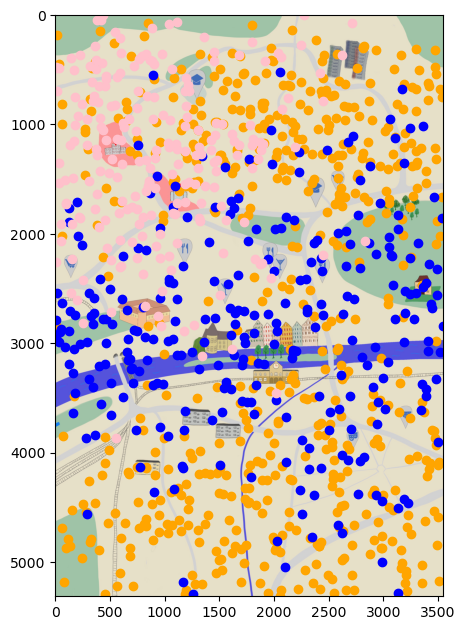

In [165]:
img = plt.imread("../assets/map.jpg")
fig, ax  = plt.subplots(figsize=(5, 16))
ax.imshow(img)
ax.scatter(data_m1.T[0], data_m1.T[1], color=col_m)
ax.scatter(data_m2.T[0], data_m2.T[1], color=col_m)
ax.scatter(data_m3.T[0], data_m3.T[1], color=col_m)
ax.scatter(data_e1.T[0], data_e1.T[1], color=col_e)
ax.scatter(data_e2.T[0], data_e2.T[1], color=col_e)
ax.scatter(data_c1.T[0], data_c1.T[1], color=col_c)

print(img.shape)


In [166]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

#Fit a DecisionTree with depth 1 to the data
model = DecisionTreeRegressor(random_state=0, max_depth=2, min_samples_leaf=5)
model.fit(locs,rents)

#Create test data points and calculate prediction
locs_x_test = np.linspace(0, 1300, 100)
locs_y_test = np.linspace(0, 842, 65)
locs_test = np.array(np.meshgrid(locs_x_test, locs_y_test)).T.reshape(-1,2)
rents_pred = model.predict(locs_test)

[Text(0.5, 0.8333333333333334, 'X[1] <= 1942.861\nsquared_error = 52.356\nsamples = 1062\nvalue = 25.556'),
 Text(0.25, 0.5, 'X[0] <= 1530.964\nsquared_error = 44.104\nsamples = 471\nvalue = 22.001'),
 Text(0.125, 0.16666666666666666, 'squared_error = 38.556\nsamples = 234\nvalue = 18.976'),
 Text(0.375, 0.16666666666666666, 'squared_error = 31.635\nsamples = 237\nvalue = 24.987'),
 Text(0.75, 0.5, 'X[1] <= 3795.522\nsquared_error = 40.832\nsamples = 591\nvalue = 28.389'),
 Text(0.625, 0.16666666666666666, 'squared_error = 54.623\nsamples = 331\nvalue = 29.86'),
 Text(0.875, 0.16666666666666666, 'squared_error = 17.016\nsamples = 260\nvalue = 26.517')]

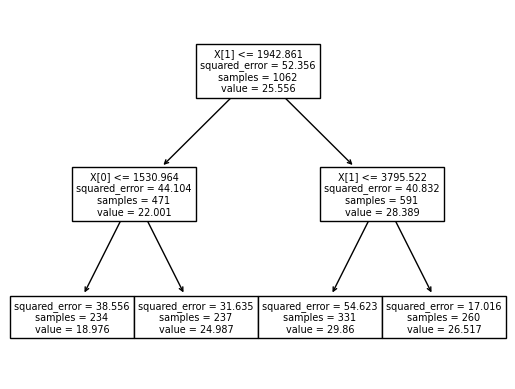

In [167]:
tree.plot_tree(model)

In [168]:
import TreeToReact as ttr
import json
dict = ttr.export_for_react(model, img)
with open('aiPythonTree.json', 'w') as f:
    json.dump(dict, f)

print(type(data.tolist()))
print(img.shape)
mietdaten = np.copy(data)
mietdaten[:,0] = data[:,0]/img.shape[1]*100
mietdaten[:,1] = data[:,1]/img.shape[0]*100
mietdaten = mietdaten.astype(int)
mietdaten = {"data": mietdaten.tolist()}
with open('mietdaten.json', 'w') as f:
    json.dump(mietdaten, f)




<class 'list'>
(5315, 3543, 3)


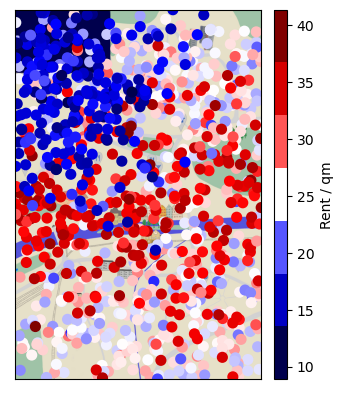

In [163]:
# Does not work properly

import matplotlib

img = plt.imread("../assets/map.jpg")
fig, ax  = plt.subplots()

# On my desktop, DPI gets scaled by 0.75
#fig, ax = plt.subplots(figsize=(6, 6), dpi=100)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)

#Plot prediction of Decision tree
#old colormap: tab20b
cmap1 = 'seismic'
cmap2 = plt.get_cmap('seismic', 7)
ax.scatter(locs_test[:,0], locs_test[:,1], marker=",", c= rents_pred, cmap = cmap2, alpha = 0.1)

#Plot the sampled data points
ax.scatter(locs[:,0], locs[:,1], marker="o", c= rents, cmap = cmap1, linewidth=2)

ax.imshow(img)

#Add a colorbar
vmin = np.min(rents)
vmax = np.max(rents)
norm = matplotlib.colors.Normalize(vmin=vmin, vmax=vmax)

cax = fig.add_axes([ax.get_position().x1+0.02,ax.get_position().y0,0.02,ax.get_position().height])
cbar = fig.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap2), cax=cax)
cbar.set_label('Rent / qm')

fig.tight_layout
None